In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mu=tf.constant(-3., dtype=tf.float32)
s=tf.constant(1., dtype=tf.float32)

rho=tf.constant(-1., dtype=tf.float32)
d=tf.exp(rho)


In [3]:
x=tf.linspace(-6.,15., 1000)

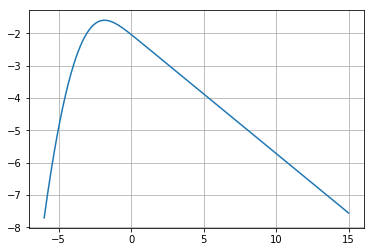

In [4]:
def log_prob(x):
    c1=(0.5*d)*tf.exp(0.5*d*(2*mu+d*s**2-2*x))
    c2=1-tf.erf((mu+d*s**2-x)/(s*tf.sqrt(2.)))
    pdf=c1*c2
    return tf.log(pdf)

sess=tf.Session()
plt.plot(sess.run(x),sess.run(log_prob(x)))
plt.grid(True)

In [5]:
# Create state to hold updated `step_size`.
step_size = tf.get_variable(
            name='step_size',
            initializer=1.,
            use_resource=True,  # For TFE compatibility.
            trainable=False)


In [6]:
# Initialize the HMC transition kernel.

kernel = tfp.mcmc.RandomWalkMetropolis(
    target_log_prob_fn=log_prob,
    seed=42)


In [7]:
# Run the chain (with burn-in).
samples, kernel_results = tfp.mcmc.sample_chain(num_results=int(1200),num_burnin_steps=int(500), current_state=1.,kernel=kernel)


In [16]:
batch=100
l=[[]]*batch
for n in range(batch):
    samples, kernel_results = tfp.mcmc.sample_chain(num_results=int(1200),num_burnin_steps=int(1e3), current_state=1.,kernel=kernel)
    l[n]=samples

    

In [9]:
len(l)

1

In [10]:
type(samples)

tensorflow.python.framework.ops.Tensor

In [11]:
# Initialize all constructed variables.
init_op = tf.global_variables_initializer()
sess=tf.Session()
sess.run(init_op)

In [12]:
samples_, kernel_results_ = sess.run([samples, kernel_results])


In [13]:
len(samples_)

1200

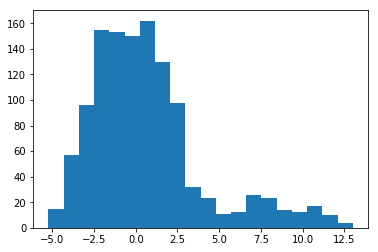

In [14]:
plt.hist(samples_, 20)
plt.show()

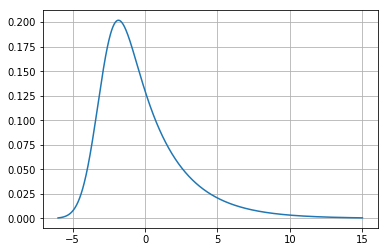

In [15]:
sess=tf.Session()
plt.plot(sess.run(x),sess.run(tf.exp(log_prob(x))))
plt.grid(True)